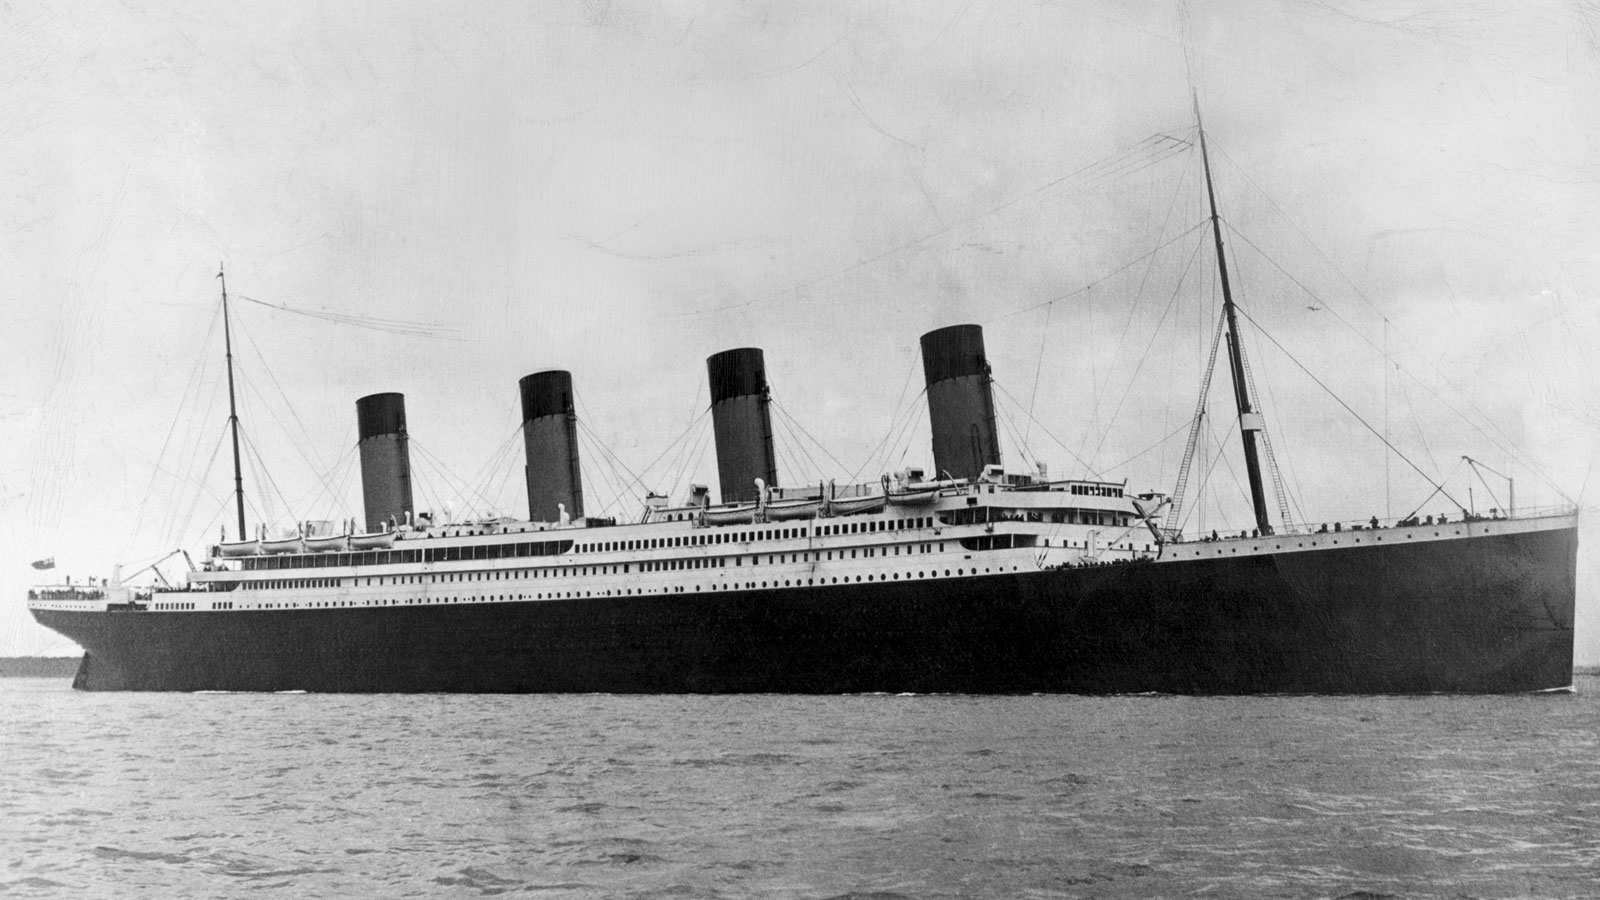

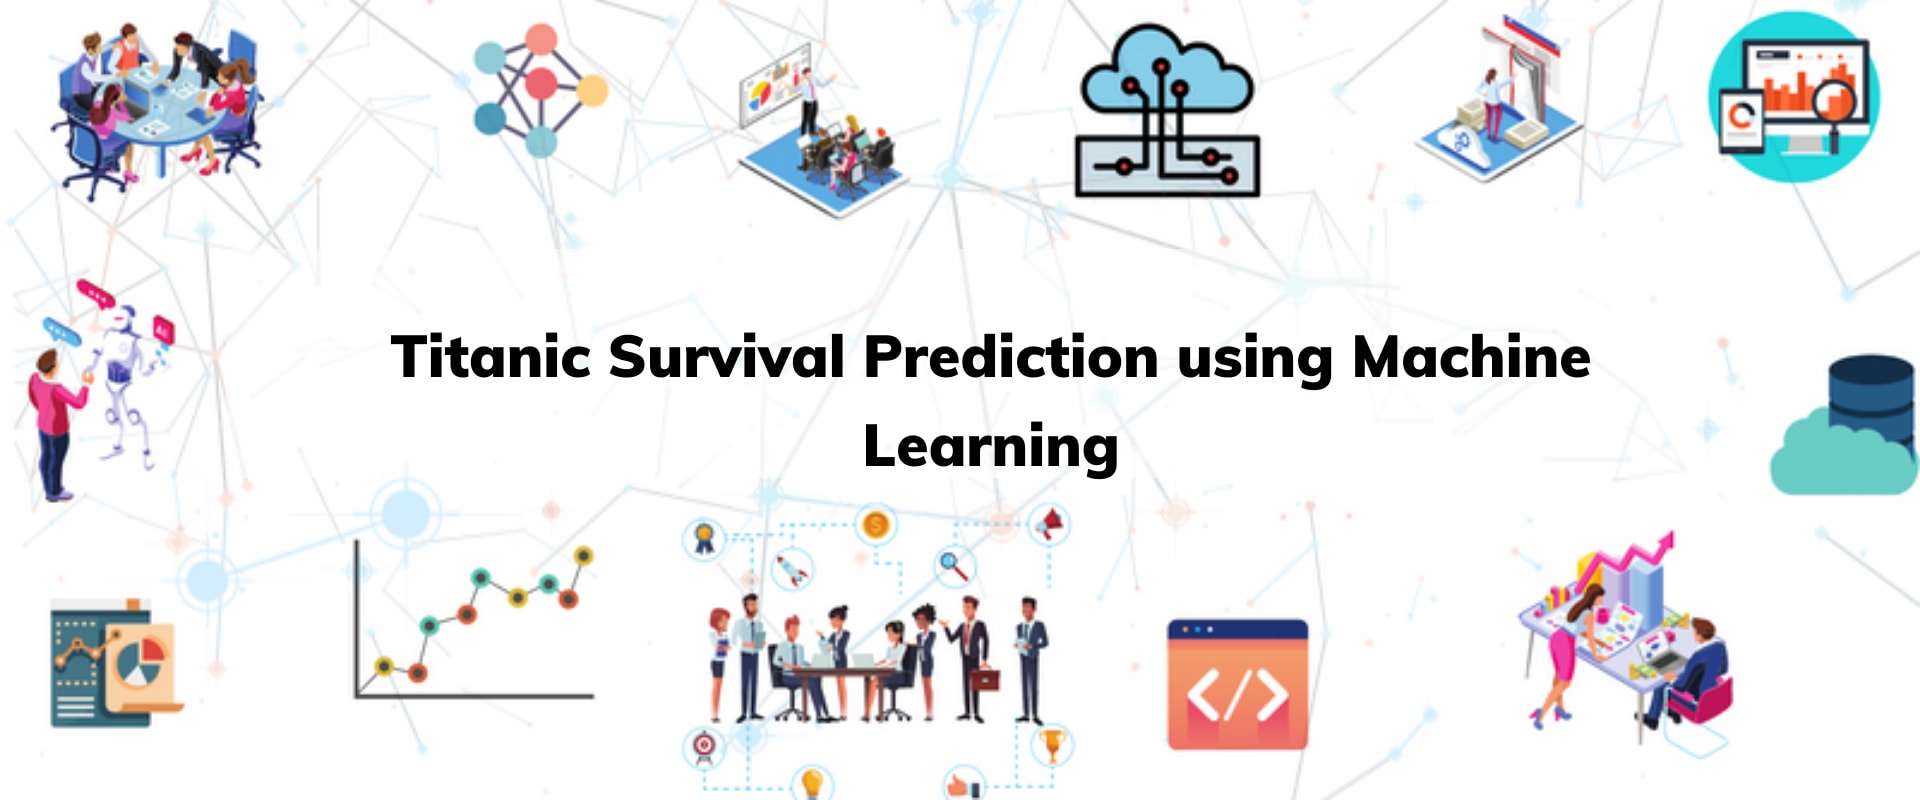 

##  <span style='background:peachpuff'> || IMPORTING NECESSARY LIBRARIES </span>

In [1]:
import pandas as pd                       # to handle data structures operations
import  numpy as np                       # for numerical calculations (arrays,matrices)
import matplotlib.pyplot as plt           # for graphs & plots
%matplotlib inline
import seaborn as sns                     # for creating heatmap,time series plots,violin plots & so on
import matplotlib.style as style          # for changing styles of plots
style.use('ggplot')

import missingno as ms                    # for missing values visualization
import warnings
warnings.filterwarnings("ignore")

## <span style='background:lavender'>|| INSERTING TRAIN & TEST DATASETS 📋</span> 

In [2]:
# inserting both of the train and test datasets

train_df = pd.read_csv("Downloads/train.csv")
test_df = pd.read_csv("Downloads/test.csv")
print("Loading of train and test datasets is successfully completed!")

# printing first 10 rows out of 'train' dataset

print("________________________________________________________________________________________________________________________________")
print('\033[1m' + 'First 10 rows of train dataset: ' + '\033[0m')
train_df.head(10)

Loading of train and test datasets is successfully completed!
________________________________________________________________________________________________________________________________
First 10 rows of train dataset: 


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
print('\033[1m' + 'First 10 rows of test dataset: ' + '\033[0m')

test_df.head(10)

First 10 rows of test dataset: 


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [4]:
# idea about the number of rows & columns in dataset

print('\033[1m' + 'The number of rows in train dataset is' + '\033[0m' ,
      len(train_df.index),'.')
print('\033[1m' + 'The number of columns in train dataset is' + '\033[0m' ,
      len(train_df.columns),'.')

The number of rows in train dataset is 891 .
The number of columns in train dataset is 12 .


In [5]:
# information about the train dataset

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## <span style='background:lightcyan'>|| DESCRIPTION OF TRAIN DATASET  📜</span> 

In [6]:
# description of dataset in 5 point summary format (min , 25% , 50% , 75% , max)

train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# checking for duplications of data values

print("Number of duplicated values existed in dataset is",
      train_df.duplicated().sum(),'.')

Number of duplicated values existed in dataset is 0 .


## <span style='background :pink' style='color:Purple'> || MISSING VALUES  </span>

In [8]:
# checking for missing values in descending order for each feature

m_val = train_df.isnull().sum().sort_values(ascending=False)            # m_val = missing values
m_val.head()

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
dtype: int64

In [9]:
# percentage of missing values for each feature

mval_per = train_df.isnull().sum()/train_df.isnull().count()*100

null_df = pd.DataFrame({'missing values' : m_val , 'Percentage' : 
                        mval_per.sort_values(ascending=False)})
null_df.head()

,missing values,Percentage
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
PassengerId,0,0.000000
Survived,0,0.000000


Text(0.5, 1.0, 'Matrix plot to see patterns of missing values')

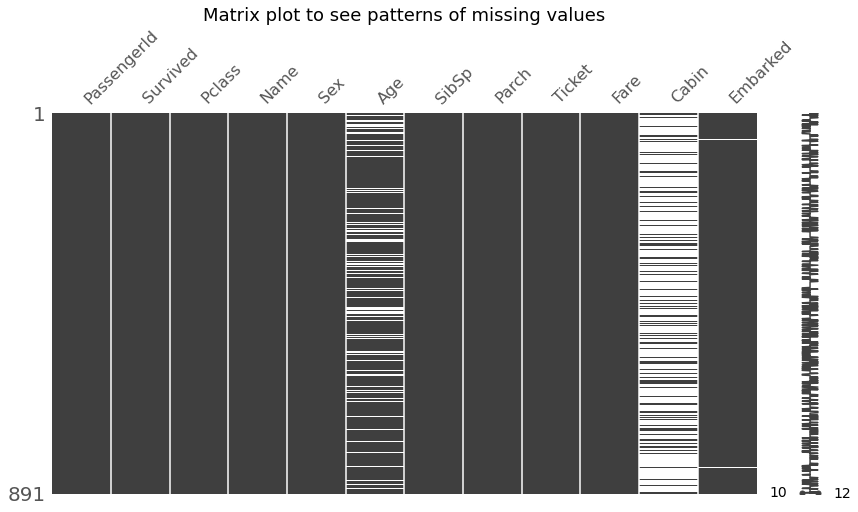

In [10]:
ms.matrix(train_df , figsize=(14,7))
plt.title("Matrix plot to see patterns of missing values",size=18)

Text(0.5, 1.0, 'Barplot to clearly see the lacking of data values')

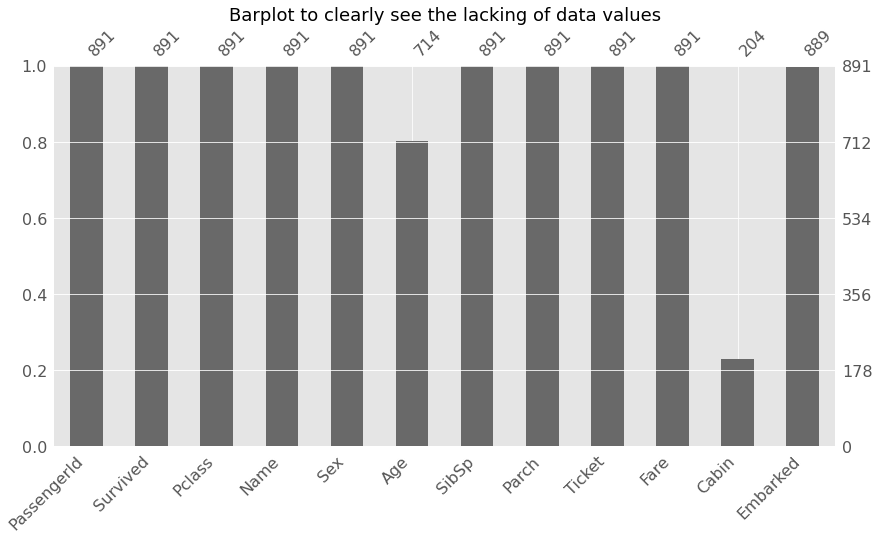

In [11]:
ms.bar(train_df , figsize=(14,7))
plt.title("Barplot to clearly see the lacking of data values",size=18)

## <span style='background:thistle'>|| REPLACING MISSING VALUES WITH MEAN VALUE 🧩</span> 

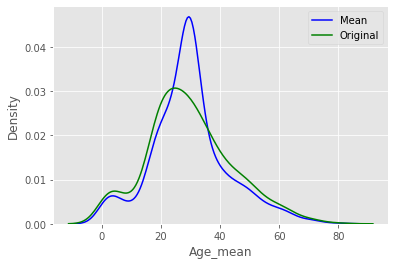

In [12]:
# first we compare between the curves for initial values and replaced-with-mean-values

train_df["Age_mean"] = train_df["Age"].fillna(train_df["Age"].mean())


# Checking difference of curves between replaced and original values

sns.kdeplot(train_df['Age_mean'] , color='blue' , label='Mean')
sns.kdeplot(train_df['Age'] , color='green' , label='Original')
plt.legend()

> `Filling up the spots of missing values does change the curve.`

In [13]:
train_df.drop(['Age_mean'] , axis=1 , inplace=True)

# finally we replace them with mean 

train_df["Age"] = train_df["Age"].fillna(train_df["Age"].mean())
test_df["Age"] = test_df["Age"].fillna(test_df["Age"].mean())


print("Number of missing values remained in column 'Age' of train data is" ,
      train_df["Age"].isnull().sum(),'.')
print("Number of missing values remained in column 'Age' of test data is" ,
      test_df["Age"].isnull().sum(),'.')

Number of missing values remained in column 'Age' of train data is 0 .
Number of missing values remained in column 'Age' of test data is 0 .


## <span style='background:lightsteelblue'>|| DROPPING UNNECESSARY COLUMNS </span>  

In [14]:
# drop the 'cabin' column from datasets as it explains the highest percentage of missing values
# also we drop name and ticket column as they are irrelevant in our analysis

train_df.drop(['Cabin' , 'Name' , 'Ticket' , 'Fare' , 'PassengerId'],
              axis=1, inplace=True)

test_df.drop(['Cabin' ,'Name' , 'Ticket' , 'Fare'], axis=1, inplace=True)

In [15]:
train_df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S


## <span style='background:palegoldenrod'>|| ANALYSIS WITH VISUALIZATION 📊 📉</span> 

In [16]:
# Value counts of survived / not survived passengers

pd.DataFrame({' ' : ['Not survived','Survived'] , 'Value counts' : train_df['Survived']
              .value_counts(), 'Percentage(%)' : [(train_df["Survived"]==0)
              .sum()*100/len(train_df) , (train_df["Survived"]==1)
                                                  .sum()*100/len(train_df)]}).set_index(' ').head()

,Value counts,Percentage(%)
,,
Not survived,549,61.616162
Survived,342,38.383838


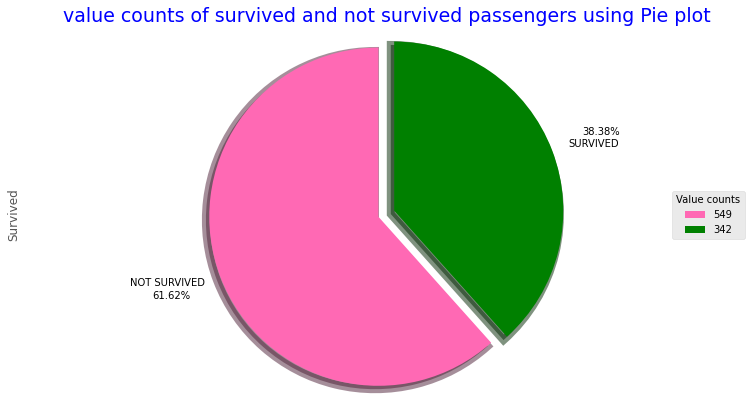

In [17]:
train_df["Survived"].value_counts().plot(kind='pie' , figsize=(13,7) , startangle=90 , autopct='%1.2f%%' , 
                                        shadow=True , labels=["NOT SURVIVED" , "SURVIVED"] , pctdistance=1.31 , 
                                         wedgeprops = {'linewidth': 8} , 
                                        colors=["hotpink" , "green"] , explode=[0.1 , 0])

plt.title("value counts of survived and not survived passengers using Pie plot" , 
          c = "b" , size=19 , y=0.99)
plt.axis("equal")

plt.legend(title="Value counts" , labels=train_df["Survived"].value_counts() , loc="center right")

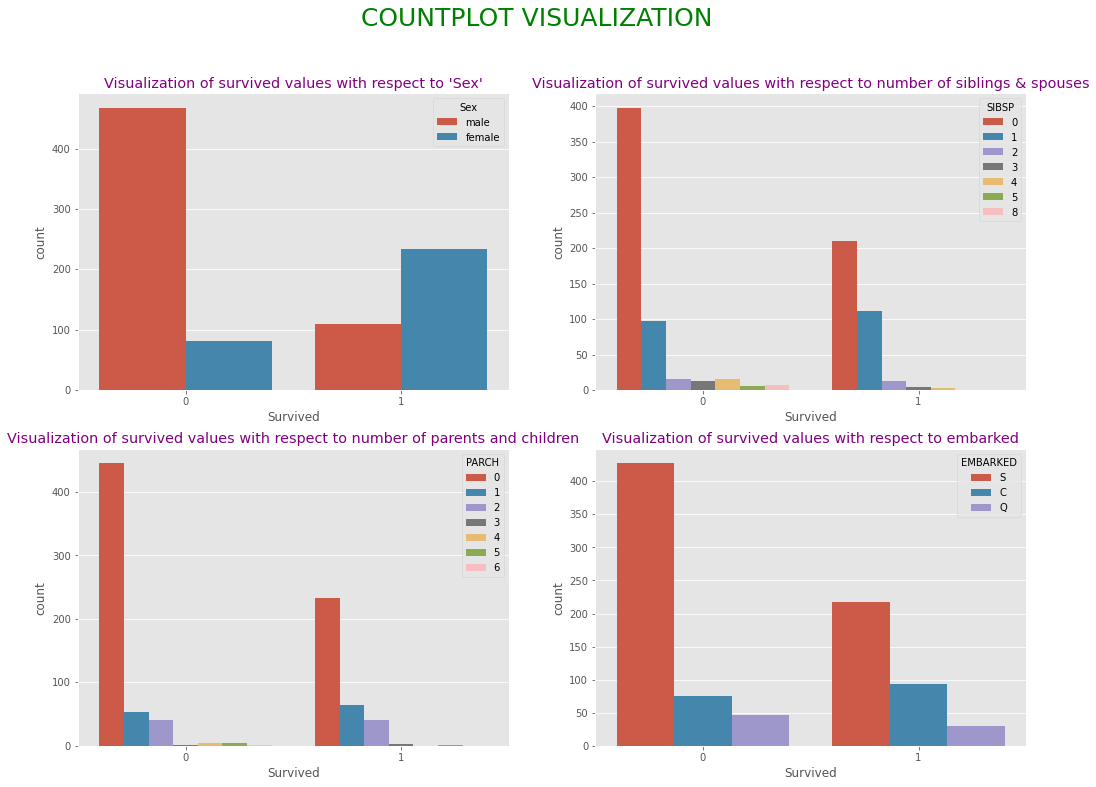

In [18]:
# Visualization of survived values with respect to different features

fig,axs = plt.subplots(nrows=2,ncols=2,figsize=(17,12));
fig.suptitle('COUNTPLOT VISUALIZATION' , c='green' , size=25)

sns.countplot("Survived" , data=train_df , hue = "Sex" , ax=axs[0][0])
axs[0][0].set_title("Visualization of survived values with respect to 'Sex'" ,  c='purple')

sns.countplot("Survived" , data=train_df , hue="SibSp" , ax=axs[0][1])
axs[0][1].set_title("Visualization of survived values with respect to number of siblings & spouses" , c='purple')
axs[0][1].legend(title='SIBSP' , loc='upper right')

sns.countplot("Survived" , data=train_df , hue="Parch" , ax=axs[1][0])
axs[1][0].set_title("Visualization of survived values with respect to number of parents and children" , c='purple')
axs[1][0].legend(title='PARCH' , loc='upper right')

sns.countplot("Survived" , data=train_df , hue="Embarked" , ax=axs[1][1])
axs[1][1].set_title("Visualization of survived values with respect to embarked" , c='purple')
axs[1][1].legend(title='EMBARKED' , loc='upper right')

plt.show()

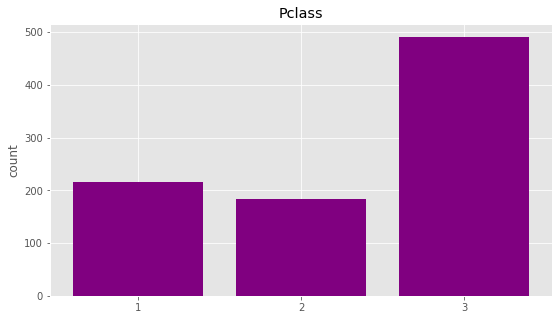

Pclass 
3    491
1    216
2    184
Name: Pclass, dtype: int64


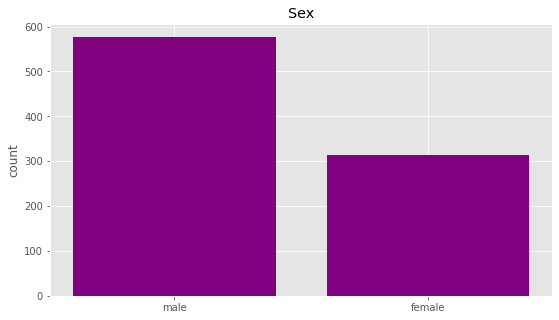

Sex 
male      577
female    314
Name: Sex, dtype: int64


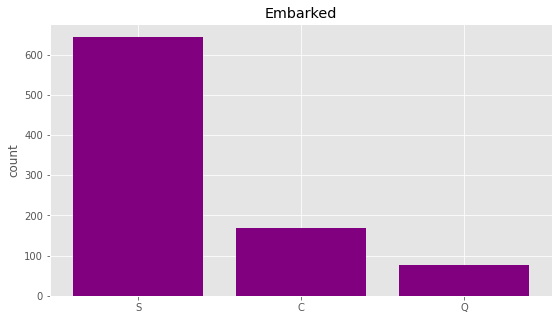

Embarked 
S    644
C    168
Q     77
Name: Embarked, dtype: int64


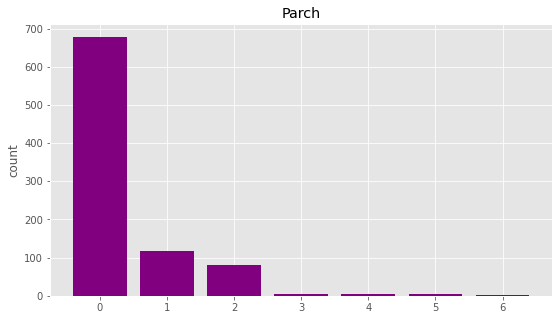

Parch 
0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64


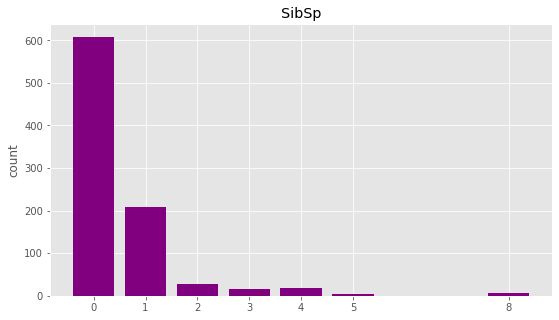

SibSp 
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


In [19]:
# creating function for barplot visualization

def bar_graph(features):
    feature = train_df[features];
    feature_val = feature.value_counts();
    
    plt.figure(figsize=(9,5));
    plt.bar(feature_val.index , feature_val , color='purple');
    plt.title(features);
    plt.xticks(feature_val.index , feature_val.index.values);
    plt.ylabel("count");
    
    plt.show();
    print("{} \n{}".format(features , feature_val));
    
# Visualizing numbers of survived passengers from different features using barplot

cols = ["Pclass" , "Sex" , "Embarked" , "Parch" , "SibSp"]
for i in cols:
    bar_graph(i)

## <span style='background:plum'> || CROSS TABLE 🧮          </span>

In [20]:
pd.crosstab(train_df["Survived"] , train_df["Pclass"] , margins=True , margins_name="Total")

Pclass,1,2,3,Total
Survived,,,,
0,80,97,372,549
1,136,87,119,342
Total,216,184,491,891


> `We see here, passengers coming from 3rd class died more than others coming from 1st or 2nd classes.
 Passengers of 1st class were likely to survive more than others`

In [21]:
pd.crosstab(train_df["Survived"] , train_df["Sex"] , margins=True , margins_name="Total")

Sex,female,male,Total
Survived,,,
0,81,468,549
1,233,109,342
Total,314,577,891


> `Female passengers happened to survive more than male passengers`

In [22]:
pd.crosstab(train_df["Survived"] , train_df["SibSp"] , margins=True , margins_name="Total")

SibSp,0,1,2,3,4,5,8,Total
Survived,,,,,,,,
0,398,97,15,12,15,5,7,549
1,210,112,13,4,3,0,0,342
Total,608,209,28,16,18,5,7,891


> Also, passengers having neither any sibling nor spouse, happened to die more than others

## <span style='background:plum'> || PIVOT TABLE 🧮          </span>

In [23]:
pivot = train_df.pivot_table("Survived" , index=['Embarked' , 'Pclass' , 'SibSp'] , columns= "Sex")
pivot

Sex                      female      male
Embarked Pclass SibSp                    
C        1      0      0.956522  0.343750
                1      1.000000  0.600000
                2      1.000000       NaN
         2      0      1.000000  0.400000
                1      1.000000  0.000000
         3      0      0.692308  0.176471
                1      0.428571  0.500000
                2      1.000000  0.000000
Q        1      1      1.000000       NaN
                2           NaN  0.000000
         2      0      1.000000  0.000000
         3      0      0.703704  0.068966
                1      0.800000  0.000000
                2      1.000000  1.000000
                4           NaN  0.000000
S        1      0      1.000000  0.321429
                1      0.904762  0.428571
                2      1.000000  1.000000
                3      1.000000  0.000000
         2      0      0.925000  0.100000
                1      0.869565  0.318182
                2      1.000000  0.200000
                3      1.000000       NaN
         3      0      0.487805  0.130435
                1      0.384615  0.187500
                2      0.000000  0.000000
                3      0.125000  0.000000
                4      0.333333  0.125000
                5      0.000000  0.000000
                8      0.000000  0.000000

In [24]:
pivot1 = pd.pivot_table(data=train_df,index=['Embarked' , 'Pclass' , 'SibSp'] , values='Survived',aggfunc=np.sum)
pivot1

Survived
Embarked Pclass SibSp          
C        1      0            33
                1            24
                2             2
         2      0             4
                1             5
         3      0            15
                1             7
                2             3
Q        1      1             1
                2             0
         2      0             2
         3      0            21
                1             4
                2             2
                4             0
S        1      0            42
                1            28
                2             2
                3             2
         2      0            44
                1            27
                2             4
                3             1
         3      0            47
                1            16
                2             0
                3             1
                4             3
                5             0
                8             0

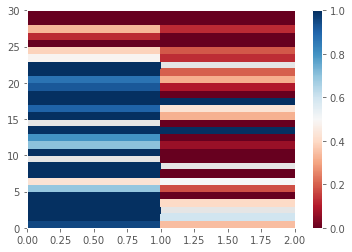

In [25]:
# Visualization of target variable over multiple variables using heatmap

plt.pcolor(pivot , cmap='RdBu')
plt.colorbar()
plt.show()

<AxesSubplot:xlabel='Embarked,Pclass,SibSp'>

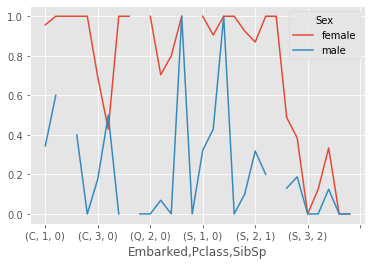

In [26]:
pivot.plot()

## <span style='background:darkkhaki'> || Data preparation for fitting a model 📈</span> 

In [27]:
# importing necessary libraries for preparing data

from sklearn.model_selection import train_test_split       # to split dataset into train & test categories
from sklearn.preprocessing import StandardScaler           # to scale data values
from sklearn.preprocessing import LabelEncoder             # for categorical variables

In [28]:
lben = LabelEncoder()             # label-encoder object

train_df["Sex"] = lben.fit_transform(train_df["Sex"].values)
train_df["Embarked"] = lben.fit_transform(train_df["Embarked"].values)

test_df["Sex"] = lben.fit_transform(test_df["Sex"].values)
test_df["Embarked"] = lben.fit_transform(test_df["Embarked"].values)

In [29]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.0,1,0,2
1,1,1,0,38.0,1,0,0
2,1,3,0,26.0,0,0,2
3,1,1,0,35.0,1,0,2
4,0,3,1,35.0,0,0,2


In [30]:
X_train = train_df.iloc[: , 1:7]
Y_train = train_df.loc[: , 'Survived']
X_test = test_df.drop("PassengerId", axis=1)     

In [31]:
sc_object = StandardScaler()             # standard-scaler object
X_train = sc_object.fit_transform(X_train)
X_test = sc_object.transform(X_test)

## <span style='background:darkgray'> || Search for best fitted model </span>

In [32]:
# libraries for different machine learning models

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC               
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [33]:
# LOGISTIC_REGRESSION MODEL 
l_regression = LogisticRegression()
l_regression.fit(X_train , Y_train)
lreg_score = round(l_regression.score(X_train, Y_train) * 100, 2)
print("Accuracy for Logistic Regression Model is: ",lreg_score )


# DECISION TREE MODEL
d_tree = DecisionTreeClassifier()
d_tree.fit(X_train , Y_train)
dtree_score = round(d_tree.score(X_train, Y_train) * 100, 2)
print("Accuracy for Decision Tree Model is: ",dtree_score )


# RANDOMFOREST MODEL
r_forest = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
r_forest.fit(X_train , Y_train)
rf_score = round(r_forest.score(X_train, Y_train) * 100, 2)
print("Accuracy for Random Forest Model is: ",rf_score )


# SVC
svc = SVC(kernel = 'rbf',random_state =0)
svc.fit(X_train,Y_train)
svc_score = round(svc.score(X_train , Y_train) * 100, 2)
print("Accuracy for SVC is: ", svc_score )


# GAUSSIAN NB
nb = GaussianNB()
nb.fit(X_train,Y_train)
nb_score = round(nb.score(X_train , Y_train) * 100, 2)
print("Accuracy for Gaussian Naive Bayes Model is: ", nb_score )


# K Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors = 3 , metric = 'minkowski', p=2)
knn.fit(X_train , Y_train)
knn_score = round(knn.score(X_train , Y_train) * 100, 2)
print("Accuracy for K-NN Model is: ", knn_score )

Accuracy for Logistic Regression Model is:  80.36
Accuracy for Decision Tree Model is:  93.71
Accuracy for Random Forest Model is:  93.71
Accuracy for SVC is:  84.4
Accuracy for Gaussian Naive Bayes Model is:  79.24
Accuracy for K-NN Model is:  86.98


In [34]:
selection = pd.DataFrame({'Models' : ['Logistic','DecisionTree','RandomForest','SVC','GaussianNB','KNN'] , 
             'Accuracy values' : [lreg_score,dtree_score,rf_score,svc_score,nb_score,knn_score]})
selection.sort_values(by='Accuracy values' , ascending=False)

,Models,Accuracy values
1,DecisionTree,93.71
2,RandomForest,93.71
5,KNN,86.98
3,SVC,84.40
0,Logistic,80.36
4,GaussianNB,79.24


Text(0.5, 1.0, 'Bar plot for comparing scores from different models')

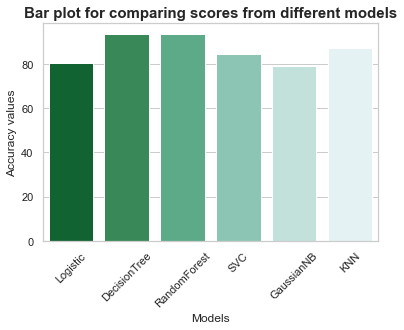

In [35]:
sns.set_theme(style="whitegrid")
sns.barplot(x='Models',y="Accuracy values",data=selection,palette="BuGn_r");
plt.xticks(rotation=45)
plt.title("Bar plot for comparing scores from different models",weight="bold",size=15)

> So, We choose RandomForest Model for our prediction.

## <span style='background:lightsalmon'> || PREDICTION WITH HELP OF RANDOMFOREST MODEL </span>

In [36]:
# using test values

final_prediction = r_forest.predict(X_test)

In [37]:
# put our predictions into a dataframe

output_df = pd.DataFrame({'PassengerId' : test_df['PassengerId'] , 'Survived'  : final_prediction})
output_df.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
5,897,0
6,898,1
7,899,0
8,900,0
9,901,0


In [38]:
output_df.to_csv("Survival_Prediction_of_Titanic.csv" , index=False)

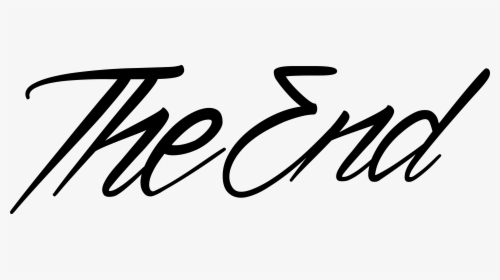